In [23]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
titanic_train = pd.read_csv("./data/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic_train.shape

(891, 12)

In [26]:
titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
titanic_train[titanic_train.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [28]:
titanic_train = titanic_train.dropna()

In [29]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [30]:
pd.crosstab(titanic_train['Sex'], titanic_train['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [31]:
pd.crosstab(titanic_train['Pclass'], titanic_train['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [32]:
titanic_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

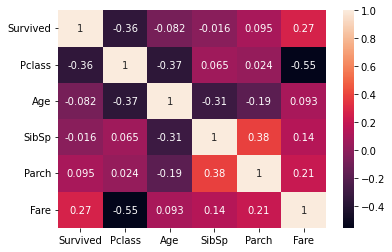

In [33]:
sns.heatmap(titanic_train.corr(), annot=True)

In [34]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
titanic_train['Sex'] = label_encoder.fit_transform(titanic_train['Sex'].astype(str))

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [35]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [36]:
titanic_train = pd.get_dummies(titanic_train, columns=['Embarked'])
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [37]:
titanic_train = titanic_train.sample(frac=1).reset_index(drop=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,24.0,0,0,7.4958,0,0,1
1,0,3,1,37.0,2,0,7.9250,0,0,1
2,0,3,1,40.0,0,0,7.8958,0,0,1
3,1,1,1,42.0,0,0,26.2875,0,0,1
4,1,2,0,25.0,1,1,30.0000,0,0,1


In [ ]:
titanic_train.to_csv('./data/titanic_train_preprocessed.csv', index=False)